<div style="text-align: right" dir="rtl">
<h1>
تحلیل متن به زبان آذربایجانی ایرانی
</h1>
</div>

<div style="text-align: right" dir="rtl"> 
هدف در این تمرین آنست که مقالات مربوط به پنج حوزه‌ی ادبیات، سینما، موسیقی، تاریخ و جغرافیا از ویکی‌پدیای آذری استخراج شده و کلمات کلیدی آن‌ها برای هر یک مشخص شوند.
</div>

<div style="text-align: right" dir="rtl"> 
<h2>جمع‌آوری داده</h2>
مجموعه داده‌ی این تکلیف با استفاده از تکنیک web scraping و از مقالات ویکی‌پدیای آذری جمع‌آوری شده و به تفکیک موضوع، در فایل‌های جیسون متناظر خود دخیره شده‌اند. هر عنصر از این فایل‌ها شامل موارد زیر است:
<ol>
  <li>category: حوزه‌ی مقاله</li>
  <li>url: لینک مقاله در ویکی‌پدیا</li>
  <li>title: عنوان مقاله</li>
  <li>content: محتوای مقاله که تنها شامل پاراگراف‌های متنی بوده و تصاویر و جداول استخراج نشده‌اند.</li>
</ol>
برای این تکلیف مقالات پنج حوزه‌ی ادبیات، سینما، موسیقی، تاریخ و جغرافیا انتخاب شده ‌اند که به شکل خام مجموعا حجمی در حدود ۱.۱ مگابایت دارند. برای تکمیل این مجموعه‌داده در نظر است مطالب باقی حوزه‌ها نیز به شکل مشابه گردآوری شوند.
در جمع‌آوری این مجموعه‌داده به چالش‌هایی نظیر بلاک شدن ip برخورد شد که از دو راهکار تعویض ip و درج فاصله‌ی چندثانیه‌ای میان درخواست‌ها برای حل آن استفاده شد.
</div>

<div style="text-align: right" dir="rtl"> 
<h3>طریقه‌ی انجام کار</h3>
ابتدا به لینک صفحه‌ی اصلی ویکی‌پدیای آذری می‌پردازیم تا از آن بتوانیم لیست موضوعات و زیرموضوعات را استخراج کنیم. در بخش موضوعلار (موضوعات) چهار موضوع اصلی آمده است که در زیر فهرست شده‌اند. ترجمه‌ی این عناوین داخل پرانتز و مقابل هر مورد عنوان شده است:
<ol>
  <li>کؤک علملر (علوم پایه)</li>
  <li>تطبیقی علملر (علوم تطبیقی)</li>
  <li>اینسانی علملر و فلسفه (علوم انسانی و فلسفه)</li>
  <li>مدنیّت و هۆنر (فرهنگ و هنر)</li>
</ol>   
هر یک از این موضوعات شامل چندین زیرموضوع هستند که از این میان پنج حوزه‌ای که پیش‌تر به آن‌ها اشاره شد، انتخاب شده‌اند.
</div>

In [1]:
#Modules to be installed:

#!python -m pip install beautifulsoup4
#!python -m pip install requests
#!python -m pip install tqdm

In [2]:
import sys
#this line is added in order to use bs4 library correctly. it may differ due to system path.
sys.path.append("../../miniconda3/lib/python3.7/site-packages")
import requests
from bs4 import BeautifulSoup
import json
from tqdm import tqdm
from random import randint
from time import sleep

In [3]:
response = requests.get(
	url="https://azb.wikipedia.org/wiki/%D8%A2%D9%86%D8%A7_%D8%B5%D9%81%D8%AD%D9%87",
)
soup = BeautifulSoup(response.content, 'html.parser')

<div style="text-align: right" dir="rtl"> 
قطعه کد زیر نام تمام حوزه‌ها را به همراه لینک هر کدام، استخراج کرده و در یک دیکشنری ذخیره می‌کند.
</div>

In [4]:
my_div = soup.find_all("div", class_="noprint hlist")
content = my_div[0]
categories = {}
links = content.find_all("a", class_="")
links = links [:-9]
for link in links:
    categories[link.text] = "https://azb.wikipedia.org/"+link['href']

In [5]:
categories

{'نوجوم': 'https://azb.wikipedia.org//wiki/%D8%A8%D8%A4%D9%84%D9%85%D9%87:%D9%86%D9%88%D8%AC%D9%88%D9%85',
 'جوغرافیا': 'https://azb.wikipedia.org//wiki/%D8%A8%D8%A4%D9%84%D9%85%D9%87:%D8%AC%D9%88%D8%BA%D8%B1%D8%A7%D9%81%DB%8C%D8%A7',
 'ریاضیات': 'https://azb.wikipedia.org//wiki/%D8%A8%D8%A4%D9%84%D9%85%D9%87:%D8%B1%DB%8C%D8%A7%D8%B6%DB%8C%D8%A7%D8%AA',
 'بیولوژی': 'https://azb.wikipedia.org//wiki/%D8%A8%D8%A4%D9%84%D9%85%D9%87:%D8%A8%DB%8C%D9%88%D9%84%D9%88%DA%98%DB%8C',
 'شیمی': 'https://azb.wikipedia.org//wiki/%D8%A8%D8%A4%D9%84%D9%85%D9%87:%D8%B4%DB%8C%D9%85%DB%8C',
 'ژئولوژی': 'https://azb.wikipedia.org//wiki/%D8%A8%D8%A4%D9%84%D9%85%D9%87:%DA%98%D8%A6%D9%88%D9%84%D9%88%DA%98%DB%8C',
 'فیزیک': 'https://azb.wikipedia.org//wiki/%D8%A8%D8%A4%D9%84%D9%85%D9%87:%D9%81%DB%8C%D8%B2%DB%8C%DA%A9',
 'ایرتیباط علمی': 'https://azb.wikipedia.org//wiki/%D8%A8%D8%A4%D9%84%D9%85%D9%87:%D8%A7%DB%8C%D8%B1%D8%AA%DB%8C%D8%A8%D8%A7%D8%B7_%D8%B9%D9%84%D9%85%DB%8C',
 'ایقتیصاد': 'https://azb.wikipedia.o

<div style="text-align: right" dir="rtl"> 
تابع کمکی زیر یک لینک دریافت کرده و قسمت‌هایی که برچسب p دارند، به ما برمی‌گرداند.
در واقع با کمک این تابع متن هر صفحه را استخراج می‌کنیم.
</div>

In [6]:
def extract_content(url):
    s_response = requests.get(
	url=url,
    )
    s_soup = BeautifulSoup(s_response.content, 'html.parser')
    text = ''
    for paragraph in s_soup.find_all('p'):
        text += paragraph.text
    return text


<div style="text-align: right" dir="rtl"> 
تابع زیر تابعیست که برای استخراج فایل جیسون مربوط به حوزه‌ی مربوطه نوشته شده است. این تابع، لینک اصلی موضوع، نام موضوع و پارامتری به نام link section دریافت کرده و مقالات آن حوزه را جمع‌آوری کرده و داخل فایلی به اسم موضوع ذخیره می‌کند. 
link section در واقع پارامتریست که تعیین می‌کند لینک‌های بخش اول از صفحه استخراج شوند یا بخش دوم و دو مقدار صفر و یک می‌گیرد.
در واقع در هر صفحه به طور کلی دو لیست از لینک‌ها قرار دارد که یکی مربوط به زیربخش‌ها بوده و با عنوان «آلت‌بؤلمه‌لر» مشخص شده است و دیگری مربوط به صفحات آن موضوع بوده و با عنوان «صفحه‌لر» مشخص شده است. آنچه ما نیاز داریم لینک‌های دسته‌ی دوم است. اما تمام صفحات هر دوی این بخش‌ها را ندارند. در این صورت زمانی که بخش اول موجود نیست، عدد مربوط به link section برابر با عدد صفر خواهد بود و در غیر این صورت این پارامتر معادل عدد یک است.
    
لازم به ذکر است که این تابع برای پنج موضوع یادشده مناسب است اما ممکن است برای تمام موضوعات عملکرد درستی نداشته باشد و نیازمند آن باشیم که تغییراتی در آن اعمال کنیم. 
برای مثال زمانی که تعداد مقالات یک موضوع به قدری زیاد باشد که در یک صفحه جا نگرفته باشد، نیاز داریم لینک صفحات مختلف را جداگانه به این تابع بدهیم و تغییرات دیگری نیز روی آن اعمال کنیم.
</div>

In [7]:
def gather_data(category_url, links_section, category_name):
    sub_response = requests.get(
    url=category_url,
    )
    sub_soup = BeautifulSoup(sub_response.content, 'html.parser')
    
    main_content = sub_soup.find_all("div", class_="mw-category mw-category-columns")
    sub_links = main_content[links_section].find_all("a")
    
    all_data = []
    sample = {}
    for sub_link in tqdm(sub_links):
        sleep(randint(10,60))
        sample['category'] = category_name
        sample['url'] = "https://azb.wikipedia.org/"+sub_link['href']
        sample['title'] = sub_link.text
        sample['content'] = extract_content("https://azb.wikipedia.org/"+sub_link['href'])
        j_sample = json.dumps(sample, ensure_ascii = False)
        all_data.append(j_sample)
    
    json_string = json.dumps(all_data, ensure_ascii = False)
    json_file = open(f"{category_name}.json", "w")
    json_file.write(json_string)
    json_file.close()

<div style="text-align: right" dir="rtl"> 
حال با داشتن نام هر کتگوری، می‌توانیم از تابع معرفی شده در بالا استفاده کنیم و فایل‌های جیسون هر موضوع که شامل مقالات مربوط به آن حوزه می‌شوند را بسازیم.
</div>

In [ ]:
name = 'ادبیات'
gather_data(categories[name], 1, name)

name = 'تاریخ'
gather_data(categories[name], 1, name)

name = 'جوغرافیا'
gather_data(categories[name], 1, name)

name = 'سینما'
gather_data(categories[name], 0, name)

name = 'موسیقی'
gather_data(categories[name], 0, name)


<div style="text-align: right" dir="rtl"> 
<h2>پاکسازی داده</h2>
در این بخش ابتدا محتوای تمام فایل‌ها را در یک لیست ذخیره می‌کنیم.
</div>

In [8]:
#Modules to be installed

#!pip install matplotlib

In [9]:
import re
import matplotlib.pyplot as plt
import random

In [10]:
category_names = ["ادبیات","تاریخ","موسیقی","جوغرافیا","سینما"]
category_names_eng = ["literature","history","music","geography","cinema"]
all_categories_data = []
for category in category_names:
    f = open(f"{category}.json", "r")
    j = json.load(f)   
    all_categories_data.append(j)

<div style="text-align: right" dir="rtl"> 
    <h3>مقایسه‌ی تعداد مقالات هر موضوع</h3>
همانطور که می‌بینیم حوزه‌ی تاریخ بیشترین مقاله و حوزه‌ی سینما کمترین مقاله را دارد.
</div>

/usr/lib/python3/dist-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


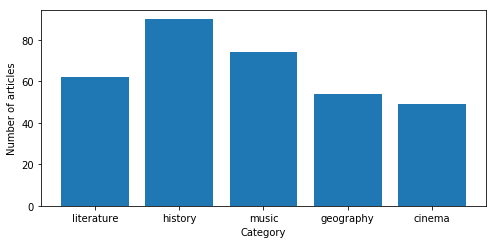

In [11]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

article_frequency = []
for i in range(len(category_names)):
    article_frequency.append((category_names_eng[i],len(all_categories_data[i])))

ind = []
fre = []
for item in article_frequency:
   ind.append(item[0])
   fre.append(item[1])
    
plt.ylabel("Number of articles")
plt.xlabel("Category")
plt.bar(ind, fre)
plt.show()

<div style="text-align: right" dir="rtl"> 
    <h3>مقایسه‌ی تعداد جملات هر موضوع</h3>
برای جداسازی جملات از کتابخانه‌ی هضم بهره گرفته شده است.
</div>

In [12]:
import hazm

i = 0
number_of_sents_list = [0,0,0,0,0]
for category_data in all_categories_data:
    for article in category_data:
        num = len(hazm.sent_tokenize(article['content']))
        number_of_sents_list[i]+=num
    i += 1

/usr/lib/python3/dist-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


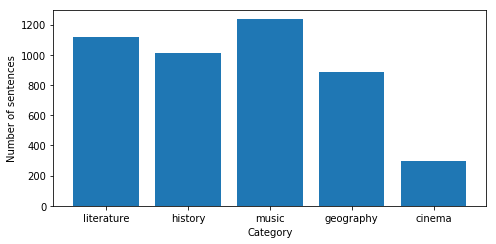

In [13]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

article_frequency = []
for i in range(len(category_names)):
    article_frequency.append((category_names_eng[i],number_of_sents_list[i]))

ind = []
fre = []
for item in article_frequency:
   ind.append(item[0])
   fre.append(item[1])
    
plt.ylabel("Number of sentences")
plt.xlabel("Category")
plt.bar(ind, fre)
plt.show()

<div style="text-align: right" dir="rtl"> 
<h3>نمونه‌مقاله از هر موضوع </h3>
تابع زیر، با گرفتن نام و ایندکس هر موضوع در لیست all_categories_data نمونه‌ای از آن را به صورت رندوم چاپ می‌کند.
</div>

In [14]:
def print_sample(name, index):
    print(57*"#"+f" {name} "+57*"#")
    sample = random.choice(all_categories_data[index])
    prettified_sample = json.dumps(sample, indent=4, ensure_ascii = False)
    print(prettified_sample)
    

In [15]:
print_sample('ادبیات', 0)
print_sample('تاریخ', 1)
print_sample('موسیقی', 2)
print_sample('جغرافیا', 3)
print_sample('سینما', 4)

######################################################### ادبیات #########################################################
{
    "category": "ادبیات",
    "url": "https://azb.wikipedia.org//wiki/%D8%A2%D8%B1%DA%A9%D8%A7%D9%8A%D8%B2%D9%85",
    "title": "آرکايزم",
    "content": "بير ديلين اسکیمیش (کؤهنلميش) سؤزلريني يا دا جومله قورولوشلاريني ايستيفاده ائده رک ادبي اثر ياراتما. بو اثرلره آرکايک دئييلير.\n"
}
######################################################### تاریخ #########################################################
{
    "category": "تاریخ",
    "url": "https://azb.wikipedia.org//wiki/%D8%A8%D8%B9%D9%84",
    "title": "بعل",
    "content": "\nبعل  (اینگیلیسجه: Baal)، بین النهرینده چوخلو میلتلرین تانریچاسی ایدی.بعل معناسی باشچی یوخسا حاکیم ایدی. قراندا صافات سوره سینده بو تانری‌نین آدی گلیبدیر و الیاس پئیغمبر اؤز ائلین بو تانریچانین قوللوقوندان اوزاق ائتماغا چالیشدی.\n\nبعل ، بِل ، بول ، هوبل(عربجه: هُبل) بو تانریچانین آدلاری دیر.\n\n"
}
#####################################

<div style="text-align: right" dir="rtl"> 
<h3>پاکسازی داده</h3>
برای پاکسازی داده موارد زیر را روی مقالات اعمال می‌نماییم:
<ol>
  <li>حذف کاراکترهایی نظیر »، «، "</li>
  <li>حذف رفرنس‌دهی‌هایی مثل [1]</li>
  <li>حذف کشیدگی کلمات در مواردی مانند تــــــابع</li>
  <li>حذف حروف لاتین</li>
  <li>تبدیل اعداد فارسی و عربی به انگیسی</li>
  <li>حذف urlها</li>
</ol>   
</div>

In [16]:
persian_to_english = {
    '۰': '0',
    '۱': '1',
    '۲': '2',
    '۳': '3',
    '۴': '4',
    '٤': '4',
    '۵': '5',
    '٥': '5',
    '۶': '6',
    '٦': '6',
    '۷': '7',
    '۸': '8',
    '۹': '9'
}

In [17]:
for category in all_categories_data:
    for article in category:
        #removing urls
        url_re = r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))"
        article['content'] = re.sub(url_re, '', article['content'])
        #removing \n 
        article['content'] = article['content'].replace("\n","")
        #removing " character
        article['content'] = article['content'].replace("\"","")
        #removing « character
        article['content'] = article['content'].replace("«","")
        #removing »  character
        article['content'] = article['content'].replace("»","")    
        #removing latin characters and tab
        article['content'] = re.sub("([A-Za-z\t])", "", article['content'])
        #removing repeating ـ which is often used for keshidan like تـــابع
        article['content'] = re.sub('ـ*', '', article['content'])
        #removing references like [۱]
        article['content'] = re.sub("\[[۱۲۳۴۵۶۷۸۹۰1234567890]*\]"," ", article['content'])
        #converting persian and arabic numbers to english
        for p in persian_to_english.keys():
             article['content'] = article['content'].replace(p,persian_to_english[p])
        #removing punctuations like ? ! , ...
        article['content'] = re.sub("([?؟،!:؛;])","", article['content'])

<div style="text-align: right" dir="rtl"> 
<h2>تحلیل داده</h2>
در این بخش به کمک ابزار yake و توسعه‌ی آن برای زبان آذری به استخراج کلمات کلیدی هر حوزه می‌پردازیم.
</div>

<div style="text-align: right" dir="rtl"> 
ابزار yake کتابخانه‌ایست که به صورت اتوماتیک به استخراج کلیدواژه‌ها می‌پردازد و برای این کار تنها متکی به فرکانس کلمات در متن نیست. این ابزار وابستگی چندانی به زبان ندارد به شرطی که لیستی از stop-wordهای آن زبان را داشته باشیم. به صورت پیش‌فرض این لیست برای زبان آذری وجود ندارد و لازم است با ایجاد فایل مربوطه و قرار دادن stopwordها در آن، این کتابخانه را برای زبان آذری قابل استفاده کنیم.برای این کار از لیستی که ترم گذشته گردآوری شده بود استفاده شده است و حدود چهل واژه به آن اضافه شده است که اکثرا واژگان کاملا جدید بوده و تعدادی فرم نوشتاری متفاوتی از آنچه پیش‌تر در فایل موجود بود دارند اما به لحاظ مفهوم، یکسانند. این لیست تحت نام stopwords_az.txt در این مسیر قرار داده شده است:./yake/yake/StopwordsList 
بدین ترتیب زبان آذری با کد az قابل استفاده است.
</div>

<div style="text-align: right" dir="rtl"> 
ابتدا محتویات تمام مقالات یک حوزه‌ی خاص را با یکدیگر ادغام می‌کنیم و بدین ترتیب پنج متغیر از نوع رشته تولید می‌شود.
</div>

In [18]:
literature_fulltext = ""
history_fulltext = ""
music_fulltext = ""
geography_fulltext = ""
cinema_fulltext = ""

i = 0
for category in all_categories_data:
    for article in category:
        if i==0:
            literature_fulltext += article['content']
        elif i==1:
            history_fulltext += article['content']
        elif i==2:
            music_fulltext += article['content']
        elif i==3:
            geography_fulltext += article['content']
        elif i==4:
            cinema_fulltext += article['content']
    i += 1

<div style="text-align: right" dir="rtl"> 
تابع زیر با گرفتن متن و پارامترهای مربوط به کتابخانه‌ی yake مانند زبان و مواردی از این قبیل، به تعدادی که مشخص می‌کنیم کلیدواژه استخراج می‌کند.
</div>

In [19]:
from yake import yake

def get_keywords(text, language, max_ngram_size, deduplication_thresold, deduplication_algo, window_size, num_of_keywords):
    custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_thresold, dedupFunc=deduplication_algo, windowsSize=window_size, top=num_of_keywords, features=None)
    keywords = custom_kw_extractor.extract_keywords(text)
    #print(keywords)
    return keywords

<div style="text-align: right" dir="rtl"> 
با قرار دادن پارامتر max_ngram_size برابر با ۳، تعیین می‌کنیم که تعداد لغات هر عبارت کلیدی از سه فراتر نرود.
در ابتدا این پارامتر را برابر یک می‌گیریم تا تنها کلیدواژه‌ها را بررسی کنیم و در مرحله‌ی بعد آن را به سه افزایش می‌دهیم.
</div>

In [20]:
language = "az"
max_ngram_size = 1
deduplication_thresold = 0.9
deduplication_algo = 'seqm'
window_size = 1
num_of_keywords = 30

In [21]:
#tabulate library is used to print out the data in a clean format
#pip install tabulate

In [23]:
from tabulate import tabulate

name = 'ادبیات'
print("*"*7 + f" {name} " + "*" * 7)
keywords = get_keywords(literature_fulltext, language, max_ngram_size, deduplication_thresold, deduplication_algo, window_size, num_of_keywords)
print(tabulate(keywords, headers = ('score', 'keyword')))


name = 'تاریخ'
print("\n")
print("*"*7 + f" {name} " + "*" * 7)
keywords = get_keywords(history_fulltext, language, max_ngram_size, deduplication_thresold, deduplication_algo, window_size, num_of_keywords)
print(tabulate(keywords, headers = ('score', 'keyword')))

name = 'موسیقی'
print("\n")
print("*"*7 + f" {name} " + "*" * 7)
keywords = get_keywords(music_fulltext, language, max_ngram_size, deduplication_thresold, deduplication_algo, window_size, num_of_keywords)
print(tabulate(keywords, headers = ('score', 'keyword')))

name = 'جوغرافیا'
print("\n")
print("*"*7 + f" {name} " + "*" * 7)
keywords = get_keywords(geography_fulltext, language, max_ngram_size, deduplication_thresold, deduplication_algo, window_size, num_of_keywords)
print(tabulate(keywords, headers = ('score', 'keyword')))

name = 'سینما'
print("\n")
print("*"*7 + f" {name} " + "*" * 7)
keywords = get_keywords(cinema_fulltext, language, max_ngram_size, deduplication_thresold, deduplication_algo, window_size, num_of_keywords)
print(tabulate(keywords, headers = ('score', 'keyword')))


******* ادبیات *******
score          keyword
---------  -----------
ایلده      0.000827726
ایل        0.00386491
فرانسه     0.00443452
بؤیوک      0.00494566
نوبل       0.00577762
آذربایجان  0.00581302
آشیق       0.00749437
ادبیات     0.00836056
ادبی       0.00845229
روس        0.0084683
آدلی       0.00988822
وار        0.0100661
کنیاز      0.0107224
صۆلح       0.0110895
عئینی      0.0114729
قدر        0.0116299
رومان      0.0116664
تاریخی     0.011701
یازیچی     0.012625
نشر        0.0132812
باش        0.0137278
حرب        0.0142383
یاخشی      0.0144741
ایللرده    0.0144821
دیلینده    0.0145018
روسیه      0.0146788
شعر        0.0155832
آدی        0.0157366
مشهور      0.0157792
–جی        0.0167885


******* تاریخ *******
score        keyword
--------  ----------
ایلده     0.00242995
بؤیوک     0.0035112
آلمان     0.00377962
شاه       0.00406985
نادر      0.00418446
دۆنیا     0.00438332
ایل       0.00462757
قدر       0.00606033
یئنی      0.00675821
پاشا      0.00779317
خان       0.00837

<div style="text-align: right" dir="rtl"> 
در زیر همین روند را برای max_ngram_sizeی برابر سه طی می‌کنیم.
</div>

In [24]:
language = "az"
max_ngram_size = 3
deduplication_thresold = 0.9
deduplication_algo = 'seqm'
window_size = 1
num_of_keywords = 30

In [25]:
name = 'ادبیات'
print("*"*12 + f" {name} " + "*" * 12)
keywords = get_keywords(literature_fulltext, language, max_ngram_size, deduplication_thresold, deduplication_algo, window_size, num_of_keywords)
print(tabulate(keywords, headers = ('score', 'keyphrase')))


name = 'تاریخ'
print("\n")
print("*"*15 + f" {name} " + "*" * 15)
keywords = get_keywords(history_fulltext, language, max_ngram_size, deduplication_thresold, deduplication_algo, window_size, num_of_keywords)
print(tabulate(keywords, headers = ('score', 'keyphrase')))

name = 'موسیقی'
print("\n")
print("*"*20 + f" {name} " + "*" * 20)
keywords = get_keywords(music_fulltext, language, max_ngram_size, deduplication_thresold, deduplication_algo, window_size, num_of_keywords)
print(tabulate(keywords, headers = ('score', 'keyphrase')))

name = 'جوغرافیا'
print("\n")
print("*"*11 + f" {name} " + "*" * 11)
keywords = get_keywords(geography_fulltext, language, max_ngram_size, deduplication_thresold, deduplication_algo, window_size, num_of_keywords)
print(tabulate(keywords, headers = ('score', 'keyphrase')))

name = 'سینما'
print("\n")
print("*"*17 + f" {name} " + "*" * 17)
keywords = get_keywords(cinema_fulltext, language, max_ngram_size, deduplication_thresold, deduplication_algo, window_size, num_of_keywords)
print(tabulate(keywords, headers = ('score', 'keyphrase')))


************ ادبیات ************
score                 keyphrase
------------------  -----------
ایلده               0.000827726
–جی ایلده           0.00250002
ایل                 0.00386491
فرانسه              0.00443452
بؤیوک               0.00494566
حرب و صۆلح          0.00507798
نوبل                0.00577762
آذربایجان           0.00581302
ایلده نشر ائدیلمیش  0.00607969
ایلده نشر           0.00633184
عئینی زامان‌دا       0.00712597
آشیق                0.00749437
نوبل ادبیات اؤدولو  0.00801602
ادبیات              0.00836056
ادبی                0.00845229
روس                 0.0084683
ایلده سلما لاقرلوف  0.00917275
نوبل اؤدولو         0.00921063
نوبل ادبیات         0.00928015
ایلده گنج           0.00958095
آدلی                0.00988822
وار                 0.0100661
کنیاز آندره         0.0104604
کنیاز               0.0107224
صۆلح                0.0110895
فرانسه دیلینده      0.0111337
نوبل اؤدولو آلان    0.0111765
–جو ایلده           0.0113644
عئینی               0.0114729
قدر        

<div style="text-align: right" dir="rtl"> 
    ترجمه‌ی چند کلمه‌ی پرتکرار کلیدواژه‌های هر حوزه در زیر آمده است. با در نظر داشتن همین عبارات کلیدی و بدون توجه به کتگوری متن نیز می‌توان موضوع متن را حدس زد:
  <ol>
  <li>ادبیات: (فرانسه، نوبل، آذربایجان، ادبیات، ادبی، رمان، روسیه، نویسنده، نشر، شعر)</li>
  <li>تاریخ:‌(آلمان، شاه، نادر، دنیا، پاشا، خان، سرزمین، جنگ، عثمانی، تاریخی)</li>
  <li>موسیقی: (موسیقی، مقام (اشاره به موسیقی مقامی آذربایجان)، آذربایجان، پریسلی، خالق، ترانه، شور، سه‌گاه، شوشتر، شعبه </li>
  <li>جغرافیا:‌(زمین، دریا، جغرافی، شرق، کشف، خاک، کوه، جنوب، مغرب، اقلیم)</li>
  <li>سینما: (کارگردان، فیلم، آذربایجان، تئاتر، سینما، بازیگر، تلویزیون، ایرانی)</li>
</ol>   
همانطور که مشاهده می‌شود برای موضوعاتی که داده‌ی بیشتری در دسترس بوده، کلیدواژه‌های بهتری استخراج شده‌اند و در حوزه‌ای مانند موسیقی یا سینما که حجم داده به نسبت پایین‌تر بوده، کلماتی مانند الویس یا پریسلی به عنوان کلیدواژه معرفی شده‌اند.
</div>